# CUADERNO DE TRABAJO PARA CLASIFICACIÓN

Vamos a trabajar y comprender cada tarea que compone un problema de modelado predictivo de aprendizaje automático:
1. Carga de fuentes de datos
2. Comprensión de los datos mediante:
    1. Estadística descriptiva
    2. Visualización.
3. Preparación del modelo.
    1. Pre-procesar los datos para describir mejor la estructura del problema.
    2. Selección de características.
4. Evaluación de los algoritmos. 
    1. Remuestreo (para evaluar el rendimiento)
    2. Métricas
    3. Comprobación puntual de una serie de algoritmos utilizando su propio conjunto de prueba.
    4. Comparación y selección de modelos
5. Mejora de la precisión del modelo
    1. Mejora de resultados utilizando métodos de conjuntos - Ensembles.
    2. Mediante el ajuste de parámetros de algoritmos - Tuning.
6. Cerrar el modelo y lo dejamos disponible para su uso futuro.
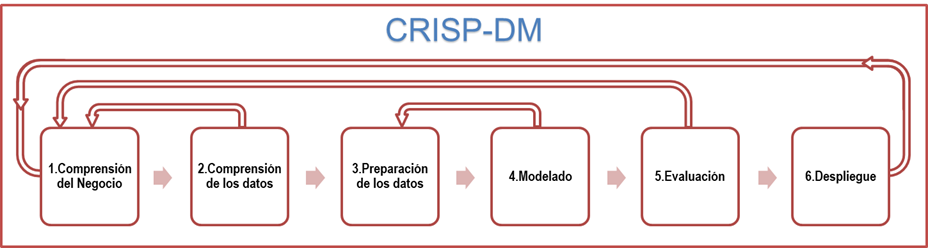

# 1. Carga de Datos

Lo primero que aprenderemos es a cargar datos. El formato más común para los datos de aprendizaje automático son los archivos CSV. 
Hay varias formas de cargar un archivo CSV en Python. Podemos ver 3 formas de cargar los datos:
1. Cargando archivos CSV con la biblioteca estándar de Python.
2. Cargando archivos CSV con NumPy.
3. Cargando archivos CSV con Pandas.

La **API de Python** proporciona el módulo CSV y la función reader() que se pueden usar para cargar archivos CSV. Una vez cargado, puede convertir los datos CSV a una matriz NumPy y usarlos para aprendizaje automático.

### 1. Carga de CSV utilizando la librería estandar de Python

In [ ]:
import csv
import numpy

fichero = './pima-indians-diabetes.data.csv'
raw_datos_sp = open(fichero, 'rt')
reader = csv.reader(raw_datos_sp, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
datos = numpy.array(x).astype('float')
print(datos.shape)

In [ ]:
print(datos)

### 2.Puedes cargar sus datos CSV usando NumPy y la función numpy.loadtxt(). 
Esta función no asume ninguna fila de encabezado y todos los datos tienen el mismo formato

In [ ]:
from numpy import loadtxt

fichero = './pima-indians-diabetes.data.csv'
datos_np = open(fichero, 'rt')
datos = loadtxt(datos_np , delimiter=",") 
print(datos.shape)

### 3.Carga de CSV desde URL utilizando Pandas y la función pandas.read_csv():

In [ ]:
import pandas as pd

datos=pd.read_csv('./pima-indians-diabetes.data.csv', header=None) 
datos.head()

# Ponemos los nombres a las columnas basándonos en la web citada
datos.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigree','Age','Outcome'] 
datos.head()


In [ ]:
print(datos)

In [ ]:
# Vemos qué datatypes ha adjudicado por defecto por si tuviéramos que modificarlos
datos.dtypes

In [ ]:
# Para averiguar el rango de valores que toma cada atributo usamos el comando .describe 
datos.describe()

In [ ]:
# Vemos que no hay valores faltantes en ninguna columna
datos.isnull().sum()

# 2. Comprensión
## 2.1 Analítica Descriptiva
Este paso nos permite prepararnos para conocer y comprender los datos. Veamos 7 pasos interesantes para comprender mejor nuestros datos de aprendizaje automático con Python. Los pasos son:
1. Echar un vistazo a sus datos en bruto (sp - sin procesar).
2. Revisar las dimensiones del dataset.
3. Revisar los tipos de datos de los atributos en sus datos.
4. Resumir la distribución de instancias entre clases en nuestro dataset.
5. Resumir nuestros datos utilizando estadísticas descriptivas.
6. Comprender las relaciones en nuestros datos utilizando correlaciones.
7. Revisar el sesgo de las distribuciones de cada atributo.

>### 1. Echar un vistazo a sus datos en bruto (sp - sin procesar). 
Nada como ver los datos en bruto. Nos va a revelar información que no se puede obtener de otra manera. También nos permite dejar muestras que pueden convertirse en ideas sobre cómo pre-procesar y manejar los datos mejor en nuestras tareas de aprendizaje automático.

In [ ]:
 # 1. Echamos un vistazo a las 20 primeras filas
    
from pandas import read_csv

fichero = './pima-indians-diabetes.data.csv'
nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
datos = read_csv(fichero, names=nombres)
vistazo = datos.head(20)
print(vistazo)

>**Comprensión:** Podemos ver que la primera columna enumera el número de fila, lo cual es útil para hacer referencia a una observación específica a posteriori.

>### 2. Revisar las dimensiones del dataset. 
Conocer en detalle la cantidad de datos que tenemos (filas y columnas).

In [ ]:
# 2.Dimensiones de nuestros datos (shape)
shape = datos.shape 
print(shape)

> **Comprensión:**
- **Demasiadas filas y algoritmos** pueden tardar demasiado en entrenarse. Muy pocas y quizás no tengamos suficientes datos para entrenar los algoritmos.
- **Demasiados atributos y pocos algoritmos** pueden tener bajo rendimiento debido al problema de la dimensionalidad.


>### 3. Revisar los tipos de datos de los atributos en sus datos. 
Usando simplemente dtypes dentro del DataFrame.

In [ ]:
# 3.Tipos de datos por cada atributo
tipos = datos.dtypes 
print(tipos)

>**Comprensión:** Podemos ver que la mayoría de los atributos son enteros, y que la mass y pedi son tipos de puntos flotantes.

>### 4. Resumir la distribución de instancias entre clases en nuestro dataset (para modelos de clasificación). 
En los problemas de clasificación, debemos saber cómo de equilibrados están los valores de clase. Con comunes los problemas muy desequilibrados (muchas más observaciones para una clase que para otra) y pueden necesitar de un tratamiento especial en la etapa de preparación de datos del proyecto. 
Con Pandas se puede obtener rápidamente una idea de la distribución del atributo de clase:

In [ ]:
# 4.Resumir la distribución de instancias entre clases en nuestro dataset # (para modelos de clasificación)
cuenta_clases = datos.groupby('class').size()
print(cuenta_clases)

>**Comprensión:** Podemos ver que hay casi el doble de observaciones con clase 0 (sin aparición de diabetes) que con clase 1 (aparición de diabetes).

>### 5. Resumir nuestros datos utilizando estadísticas descriptivas. 
Es verdad que podemos crear más resúmenes de los que podemos revisar, pero la función describe() de los DataFrame enumera 8 estadísticas de cada atributo: Recuento, Media, Desviación estándar, Valor mínimo, Percentil 25, Percentil 50 (mediana), Percentil 75 y Valor máximo.

In [ ]:
 # 5.Resumen estadística descriptiva
from pandas import set_option
set_option('display.width', 100) 
set_option('precision', 3) 
descripcion = datos.describe() 
print(descripcion)

>**Comprensión:** Al describir nuestros datos de esta manera, tenemos posibilidad de revisar las observaciones de los resultados en detalle. Esto es útil también para revisar la presencia de valores de NA para datos faltantes o distribuciones llamativas para atributos.
- *Hay un par de llamadas a la opción pandas.set() que nos permite cambiar la precisión de los números y la amplitud de la salida, pero lo hacemos para que sea más legible para este ejemplo.*

>### 6. Comprender las relaciones en nuestros datos utilizando correlaciones (relación entre dos variables y su variabilidad conjunta). 
El método más común para calcular la correlación es el coeficiente de correlación de Pearson, que asume una distribución normal de los atributos involucrados:
- Una correlación de -1 o 1 muestra una correlación negativa o positiva completa, respectivamente. 
- Mientras que un valor de 0 no muestra ninguna correlación en absoluto. 

>Algunos algoritmos de aprendizaje automático (la regresión lineal y logística), pueden tener un rendimiento deficiente si existen atributos muy correlacionados en nuestro dataset.

In [ ]:
 # 6.Parejas de correlaciones de Pearson
correlaciones = datos.corr(method='pearson') 
print(correlaciones)

>**Comprensión:** La matriz enumera todos los atributos en la parte superior y en el lateral, para dar una correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver la línea diagonal a través de la matriz desde la esquina superior izquierda hasta la esquina inferior derecha de la matriz que muestra la correlación perfecta de cada atributo consigo mismo.

>### 7. Revisar el sesgo de las distribuciones de cada atributo (distribuciones univariadas). 
**El sesgo (skew)** se refiere a una distribución que se supone gaussiana (normal o curva de campana) que se desplaza o aplasta en una dirección u otra. Muchos algoritmos de aprendizaje automático asumen una distribución gaussiana. 

>Saber que un atributo tiene un sesgo nos permitirá realizar una preparación de datos que tenga en cuenta esto y corregirlo para mejorar la precisión de nuestros modelos.

In [ ]:
# 7.Sesgo por cada atributo
skew = datos.skew() 
print(skew)

>**Comprensión:** El resultado de sesgo muestra un sesgo positivo (derecha) o negativo (izquierda). Los valores más cercanos a cero muestran menos sesgo.

## 2.2. Visualización
La forma más rápida de aprender más sobre sus datos es usar la visualización de datos. Está orientada a comprender sus datos para obtener los mejores resultados de los algoritmos de aprendizaje automático.

Se suele trabajar con diagramas univariadas que se utilizan para comprender cada atributo de nuestro dataset de forma independiente:
- Histogramas.
- Diagramas de densidad.
- Diagramas de caja y bigotes (Box & Whisker).

> ### 1. Diagramas univariados. Histogramas
Los histogramas agrupan los datos en **contenedores (bins)** y le proporcionan un recuento del número de observaciones en cada contenedor.

De la forma de los contenedores, puede obtener rápidamente una idea de si un atributo es **gaussiano, sesgado** o incluso tiene una distribución **exponencial**. También puede ayudarte a ver posibles valores atípicos (**outliers**).

In [ ]:
# Histogramas univariados
from matplotlib import pyplot
from pandas import read_csv

fichero = './pima-indians-diabetes.data.csv'
nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
datos = read_csv(fichero, names=nombres)

datos.hist()
pyplot.show()

> ### 2. Diagramas univariados. Densidad
Los gráficos de densidad son otra forma de obtener una idea rápida de la distribución de cada atributo. Las parcelas se ven como un histograma abstracto con una curva suave dibujada a través de la parte superior de cada contenedor (bin), como lo veíamos con los histogramas.

In [ ]:
# Diagramas de densidad univariada

datos.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

> ### 3. Diagramas univariados.  Caja y bigotes (Box & Whisker)
Otra forma útil de revisar la distribución de cada atributo es usar los diagramas de caja y bigotes o los gráficos de caja para abreviar.

>Los diagramas de caja resumen la distribución de cada atributo, trazando una línea para la mediana (valor medio) y un cuadro alrededor de los percentiles 25 y 75 (el 50% medio de los datos).

>Los **bigotes** dan una idea de la dispersión de los datos y los puntos fuera de los bigotes muestran valores de valores atípicos candidatos (valores que son 1.5 veces mayores que el tamaño de la dispersión del 50% medio de los datos).

In [ ]:
# Diagrama de caja y bigotes

datos.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

> ### 4. Diagramas Multivariados. Matriz de Correlación
La correlación da una indicación de cómo de relacionados están los cambios entre dos variables:
- Si dos variables cambian en la misma dirección, se correlacionan positivamente. 
- Si cambian juntos en direcciones opuestas (uno sube, uno baja), entonces están correlacionados negativamente.

>Puedes calcular la correlación *entre cada par de atributos*. Esto se llama una matriz de correlación. Luego puede trazar la matriz de correlación y tener una idea de qué variables tienen una alta correlación entre sí.

>Está muy bien saberlo, ya que algunos algoritmos de aprendizaje automático, como la regresión lineal y logística, pueden tener un bajo rendimiento si hay variables de entrada altamente correlacionadas en sus datos.

In [ ]:
#1.Diagrama de la matriz de correlación (multivariante)
import numpy as np

correlaciones = datos.corr()

In [ ]:
# Dibujamos la matriz de correlación (genérica)

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlaciones, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [ ]:
#Dibujamos la matriz de correlación

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlaciones, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(nombres)
ax.set_yticklabels(nombres)
pyplot.show()

> ### 5. Matriz de dispersión
Un diagrama de dispersión muestra la relación entre dos variables como puntos en **2 dimensiones**, un eje para cada atributo. Puede crear un diagrama de dispersión para cada par de atributos en sus datos.

>Dibujar todos estos gráficos de dispersión juntos se llama una **matriz de gráficos de dispersión**.

>Los diagramas de dispersión son útiles para detectar relaciones estructuradas entre variables, como un resumen de la relación entre dos variables con una línea. Los atributos con relaciones estructuradas también pueden estar correlacionados y ser buenos candidatos para ser eliminados de su conjunto de datos.

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(datos)
pyplot.show()

***
# 3. Preparación del modelo
## 3.1 Pre-procesado
Muchos algoritmos de aprendizaje automático hacen suposiciones sobre sus datos. A menudo es una muy buena idea preparar sus datos de tal manera que exponga mejor la estructura del problema a los algoritmos de aprendizaje automático que pretende utilizar.

Con la ayuda de scikit-learn podemos:
- **a) Re-escalar los datos.**
- **b) Estandarizar los datos.**
- **c) Normalizar los datos.**
- **d) Binarizar datos.**

El objetivo de transformar los datos es el de exponer mejor la estructura del problema a los algoritmos de modelado.

**NECESIDAD:** 
- A veces los algoritmos pueden ofrecer mejores resultados sin procesamiento previo.
- Lo más normal:
    - Crear muchas vistas y transformaciones diferentes de sus datos.
    - Ejecutar un grupo de algoritmos en cada vista de su conjunto de datos.
    
La biblioteca scikit-learn proporciona dos formas estándar para transformar datos. Cada uno es útil en diferentes circunstancias. Estas transformaciones se calculan de tal manera que se pueden usar con datos train y con cualquier muestra de datos que pueda tener en el futuro.

Con scikit-learn trabajaremos 2 métodos distintos:
- **Ajuste y transformación múltiple:**
    - Llamamos a la función *fit()* para preparar los parámetros de la transformación una vez en sus datos.
    - Más adelante, utilizamos utilizar la función *transform()* en los mismos datos para prepararla para el modelado y nuevamente en el conjunto de datos de prueba o validación o en los nuevos datos que pueda ver en el futuro. 
- **Combinación de ajuste y transformación:**
    - Utilizado para una sola tarea

In [ ]:
# Cargamos el dataset con Pandas que es muy útil
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

fichero = './pima-indians-diabetes.data.csv'
nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(fichero, names=nombres)
array = dataframe.values

>**a) Re-escalar de datos (entre 0 y 1)**
Cuando sus datos se componen de atributos con diferentes escalas, muchos algoritmos de aprendizaje automático pueden beneficiarse de volver a escalar los atributos para que todos tengan la misma escala

>Esto se conoce como normalización y los atributos a menudo se vuelven a escalar en el rango entre **0 y 1**:
- Esto es útil para los algoritmos de optimización utilizados en el núcleo de los algoritmos de aprendizaje automático, como la pendiente de gradiente (gradient descent).
- También es útil para algoritmos que ponderan entradas como regresión y redes neuronales y algoritmos que usan medidas de distancia como k-vecinos más cercanos (k-Nearest Neighbors). 

>Puedes volver a escalar sus datos con scikit-learn usando la clase **MinMaxScaler**.

In [ ]:
# separamos matriz en componentes de entrada y salida
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# resumimos los datos transformados
set_printoptions(precision=3)
print(rescaledX[0:5,:])

>**b) Estandarizar los datos (0 mean, 1 stdev).**
La estandarización es una técnica útil para transformar atributos con una distribución gaussiana y medias diferenciales y desviaciones estándar a una distribución gaussiana estándar con una media de 0 y una desviación estándar de 1.

>Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y trabajar mejor con datos re-escalados, como regresión lineal, regresión logística y análisis de discriminación lineal.

>Puede estandarizar los datos usando scikit-learn con la clase **StandardScaler**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# matriz separada en componentes de entrada y salida
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# resumimos los datos transformados
set_printoptions(precision=3)
print(rescaledX[0:5,:])

>**c) Normalizar datos (longitud de 1).**
Normalizar en scikit-learn se refiere a cambiar la escala de cada **observación (fila)** para que tenga una longitud de 1 (denominada norma de unidad o vector con la longitud de 1 en álgebra lineal).

>Este método de preprocesamiento puede ser útil para **conjuntos de datos dispersos** (muchos ceros) con atributos de diferentes escalas cuando se usan algoritmos que ponderan valores de entrada como redes neuronales y algoritmos que usan medidas de distancia como k-Vecinos más cercanos.

>Podemos normalizar los datos en Python con scikit-learn usando la clase **Normalizer**.

In [ ]:
from sklearn.preprocessing import Normalizer

# separamos matriz en componentes de entrada y salida
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# resumimos los datos transformados
set_printoptions(precision=3)
print(normalizedX[0:5,:])

>**d) Binarización (0,1).**
Podemos transformar sus datos utilizando un umbral binario.
Todos los valores por encima del umbral están marcados como 1 y todos iguales o por debajo están marcados como 0. Esto se denomina ‘binarizar’ sus datos o **poner un umbral** a sus datos:
- Puede ser útil cuando tienes probabilidades de que quieras hacer valores nítidos.
- También es útil cuando se trata de ingeniería de características y desea agregar nuevas características que indiquen algo significativo.

Puede crear nuevos atributos binarios en Python usando scikit-learn con la clase **Binarizer**.

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# resumimos los datos transformados
set_printoptions(precision=3)
print(binaryX[0:5,:])

## 3.2 Selección de Características

Las características de los datos utilizados para entrenar los modelos de aprendizaje automático tienen mucha influencia en el rendimiento que darán.

Las características irrelevantes o parcialmente relevantes pueden afectar negativamente el rendimiento del modelo. 

Veamos técnicas de selección automática de características que puede utilizar para preparar sus datos de aprendizaje automático en Python con scikit-learn, destacando:
1. **Selección univariante.**
2. **Eliminación de la característica recursiva.**
3. **Análisis de componentes principales.**
4. **Importancia de la característica.**

**OBJETIVO:** La selección de características es un proceso en el que selecciona automáticamente aquellas características en nuestros datos que afectan más a la variable o resultado de predicción que buscamos.

Tener características irrelevantes en los datos puede disminuir la precisión de muchos modelos, especialmente algoritmos lineales como regresión lineal y logística.

Tres beneficios de realizar la selección de características antes de modelar sus datos son:
- Reduce el **OVERFITTING** (sobreajuste): menos datos redundantes significa reducir las probabilidades de **tomar decisiones basadas en el ruido**.
- Mejora del **ACCURACY** (precisión): menos datos engañosos significa SIEMPRE una mejora del de la precisión del modelado.
- Reduce el tiempo de **TRAINING** (entrenamiento): Menos datos significa que los algoritmos se entrenan más rápido.

In [ ]:
## Para Selección univariada
from sklearn.feature_selection import SelectKBest, chi2

## Para PCA
from sklearn.decomposition import PCA

## Para RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, SGDClassifier

## Para importancia de la característica
from sklearn.ensemble import ExtraTreesClassifier

X = array[:,0:8]
Y = array[:,8]

> ### 1. Selección univariante.
Jugar probando con estadísticas nos ayuda a seleccionar aquellas características que tienen una relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con diferentes pruebas estadísticas para seleccionar un número específico de funciones.

>En el ejemplo utiliza la prueba estadística de ji cuadrado (chi2) para características no negativas para seleccionar 4 de las mejores características del dataset Pima (diabetes en indios Pima).

>**CONCLUSIÓN:** Puede ver los puntajes de cada atributo y los 4 atributos elegidos (aquellos con los puntajes más altos): **plas, test, mass y age.** Obtenemos los nombres de los atributos elegidos asignando manualmente el índice de las 4 puntuaciones más altas al índice de los nombres de atributos.


In [ ]:
# 1.Extracción de características con pruebas estadísticas univariadas 

##  (Chi-cuadrado para clasificación)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# resumir puntuaciones
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# resumen de las características seleccionadas
print(features[0:5,:])

> ### 2. RFE (*Recursive Feature Elimination* - Eliminación Recursiva de Características)
La Eliminación de características recursivas (o RFE) funciona eliminando atributos recursivamente y construyendo un modelo sobre aquellos atributos que permanecen. Utiliza la precisión del modelo para identificar qué atributos (y qué combinación de atributos) contribuyen más a la predicción del atributo objetivo.

>En el ejemplo utilizamos RFE con el algoritmo de regresión logística para seleccionar las 3 funciones principales. La elección del algoritmo no importa demasiado siempre que sea hábil y consistente.

>**CONCLUSIÓN:** Puedes ver que RFE eligió las 3 características principales como preg, mass y pedi. Estos están marcados como TRUE en la **matriz de soporte** y marcados con una opción 1 en la **matriz de clasificación**. También podemos asignar manualmente los índices de características a los índices de nombres de atributos.


In [ ]:
# 2.Extracción de características con RFE
## modelo = LogisticRegression(solver='lbfgs')
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
modelo = SGDClassifier(max_iter=500,tol=1e-3,loss='log') #loss='modified_huber'
rfe = RFE(modelo, 3)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

> ### 3. PCA (*Principal Component Analysis* – Análisis de Componente Principal)
El análisis de componentes principales (o PCA) utiliza el álgebra lineal para transformar el conjunto de datos en una forma comprimida. Se trata de una **técnica reducción de datos**. Una **propiedad** de PCA es que puede elegir el número de dimensiones o componentes principales en el resultado transformado. 

>En el ejemplo, usamos PCA y seleccionamos 3 componentes principales.

>**CONCLUSIÓN:** Podemos ver que el conjunto de datos transformado (3 componentes principales) se parece poco a los datos de origen.

In [ ]:
# 3.Extracción de características con PCA
pca = PCA(n_components=3)
fit = pca.fit(X)

# resumir componentes
print("Varianza explicada: %s" % fit.explained_variance_ratio_)
print(fit.components_)

> ### 4. Importancia de Características
Las bolsas de árboles de decisión (bagged decisión trees) como Random Forest y Extra Trees se pueden usar para estimar la importancia de las características.

>En el ejemplo, construimos un clasiﬁcador *ExtraTreesClassifier* para el inicio de datos.

>**CONCLUSIÓN:** Puede ver que se nos otorga una puntuación de importancia para cada atributo en el que cuanto mayor sea ésta, más importante es el **atributo**. Las puntuaciones sugieren la importancia de los plas, age y mass.

In [ ]:
# 4.Extracción de importancia de las características
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

***
# 4.Evaluación de los algoritmos

##    4.1. Remuestreo (para evaluar el rendimiento)
Esta etapa trata de resolver la siguiente necesidad: saber cómo se comportarán nuestros algoritmos con datos aún no trabajados.

Debemos usar nuestro algoritmo entrenado con nuevos datos (no utilizados para entrenar), con lo que la **EVALUACIÓN es una estimación para comprobar como de buenas serán las predicciones que hará en la práctica.** NO es una garantía de rendimiento.

**PROBLEMA PLANTEADO**
*¿Cuál es el problema de usar un algoritmo de aprendizaje automático en un dataset de entrenamiento y después utilizar las predicciones de este mismo dataset para evaluar el rendimiento?* La respuesta es simple:
		**OVERFITTING o SOBREAJUSTE**
Como el algoritmo se acuerda de todo lo que ha observado durante el entrenamiento y por tanto sabe la respuesta, no a nuevas preguntas, sino a las mismas de antes tendrá una puntuación perfecta con ellas. Pero cuando vaya a predecir dará resultados muy malos.

Debemos usar nuestro algoritmo entrenado con nuevos datos (no utilizados para entrenar), con lo que la **EVALUACIÓN es una estimación para comprobar como de buenas serán las predicciones que hará en la práctica**. **NO** es una garantía de rendimiento.

In [ ]:
# -*- coding: utf-8 -*-
"""
Métodos de Evaluación de algoritmos

"""
##Preparamos los entornos
from pandas import read_csv
from sklearn.linear_model import LogisticRegression

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

Una vez estimado el rendimiento de nuestro algoritmo, podemos volver a entrenar el algoritmo entrenado ﬁnal en todo el dataset de entrenamiento y prepararlo para el uso en operación (en real).

Vamos a revisar **4 técnicas** que podemos usar para dividir nuestro conjunto de datos de entrenamiento y crear estimaciones útiles de rendimiento para nuestros algoritmos de aprendizaje automático:
1. Conjuntos de entrenamiento y test (particionado).
2. Validación cruzada (Cross-Validation) de k-folds.
3. Validación cruzada dejando fuera 1 partición (LOO).
4. Validación cruzada sobre particiones de Entrenamientos-Pruebas aleatorias.

> ### Técnica 1. Conjuntos de entrenamiento y test (Train-Test)

Es el método más simple: utilizar **diferentes** conjuntos de datos de entrenamiento y test. Cogemos el *dataset* original y lo dividimos en 2:
- **Entrenamos** el algoritmo en la primera parte y testeamos predicciones en la segunda parte.
- **Evaluamos** las predicciones últimas contra los resultados esperados. 
- **Tamaño de la división:** Puede depender del tamaño y las especificaciones del dataset, aunque es común utilizar **(2/3 – 1/3) -> el 67%** de los datos para la entrenar y el 33% restante para las pruebas.

**VENTAJAS:** Es muy rápido. Si hay millones de registros y hay pruebas sólidas de que cada partición sigue representando el problema subyacente, es muy útil cuando con otros métodos tarda mucho tiempo en entrenarse.

**INCONVENIENTES:** Mucha variación, que hace que las diferencias en precisión entre el dataset de entrenamiento y el de test puedan ser significativas.

In [ ]:
# Evaluar usando conjuntos de datos Train-Test con regresión logística
from sklearn.model_selection import train_test_split

#Importante mantener la misma semilla para comparar entre distintas técnicas.
test_size = 0.33
seed = 7
# NOS FIJAMOS EN DETALLE - ver cómo se entrenan los datos para hacer un model.fit(), mediante train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=150)

model.fit(X_train, Y_train)
results = model.score(X_test, Y_test)
print("Precisión TT: %.3f%%" % (result*100.0))

## AVANZADO. Podéis utilizar funciones que nos digan el timestamp antes y después de la ejecución, asignarlas a variables y 
##  restarlas para ver el tiempo de procesamiento de cada uno

> ### Técnica 2. Validación cruzada (Cross-Validation) de k-folds

La **validación cruzada (o Cross-Validation)** es un enfoque que puede utilizar para estimar el rendimiento de un algoritmo de AA con menos varianza que una única división de conjunto de prueba de entrenamiento. 
- Dividimos el dataset en partes k (por ejemplo, k = 3, 5 ó 10 para miles de registros). Cada división de los datos se llama **split**. 
- El algoritmo se entrena en k −1 splits sin usar 1 y se prueba en ese split sin usar.
- Esto se repite para que cada split del dataset en algún momento sea el no usado.
- Como resultado tenemos k diferentes valoraciones de rendimiento que podemos resumir utilizando **una media y una desviación estándar**.

La elección de k debe hacerse de forma que el tamaño de cada partición de prueba (test) sea lo suficientemente grande como para ser una muestra razonable del problema, a la vez que se permiten suficientes iteraciones de la evaluación del algoritmo (en Train-Test) que de buenos resultados con nuevos datos.

**VENTAJAS:**
Es más preciso porque el algoritmo se entrena y evalúa varias veces con  diferentes datos.

**INCONVENIENTES:** 
Depende de la selección correcta de las particiones.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Evaluar con Validación Cruzada - Cross Validation
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=150)
results = cross_val_score(model, X, Y, cv=kfold)
print("Precisión VC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

> ### Técnica 3. Validación cruzada dejando fuera 1 partición (LOO)

Se trata de una variación en la que podemos configurar la validación cruzada para que el tamaño del split sea 1 (k se ajusta al número de observaciones del dataset) y se denomina validación cruzada leave-one-out (LOO).

**VENTAJA:** 
Como resultado nos proporciona una gran cantidad de medidas de rendimiento resumiendo el esfuerzo necesario para ofrecer estimaciones razonables de la precisión del modelo para nuevos datos.

**INCONVENIENTE:** 
Depende de la selección correcta de las particiones.

In [ ]:
# Evaluar con Validación Cruzada dejando una partición - LOO
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=150)
results = cross_val_score(model, X, Y, cv=loocv)
print("Precisión VC_LOO: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

> ### Técnica 4. Validación cruzada sobre particiones de Train-Test aleatorias (*Shuffle Split*)

Otra variación en la **validación cruzada de K-fold** es crear una división aleatoria de los datos como la división de Test-Train descrita anteriormente, pero **repetir el proceso de división y evaluación del algoritmo varias veces**, como la validación cruzada. 

**VENTAJA:**
Combina la velocidad de usar una Test-Train con la reducción en la varianza en el rendimiento estimado de la validación cruzada de k-fold. Además podemos repetir el proceso tantas veces como sea necesario para mejorar la precisión. 

**INCONVENIENTE:** 
Las repeticiones pueden incluir gran parte de los mismos datos en los split  de Train-Test de una ejecución a otra, lo que introduce redundancia en la evaluación. 

In [ ]:
# Evaluación mediante repetición aleatoria de particiones Train-Test
from sklearn.model_selection import ShuffleSplit

n_splits = 10
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=150)
results = cross_val_score(model, X, Y, cv=kfold)
print("Precisión VC_ShuffleSplit: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

### CONSEJOS DE REMUESTREO

- Normalmente la **validación cruzada con k-fold es el estándar de oro** para evaluar el rendimiento de un algoritmo de aprendizaje automático en datos no tratados con k establecido en 3, 5 o 10.

- El uso de un Train-Test es bueno para **mejorar la rapidez cuando se usa un algoritmo lento** y produce estimaciones de rendimiento con **menor sesgo** cuando se usan datasets grandes.

- Técnicas como la validación cruzada dejando uno fuera (LOO) y las divisiones aleatorias repetidas (Shuffle-splits) serán aproximaciones útiles para intenta equilibrar la varianza en el **rendimiento estimado, la velocidad de entrenamiento del modelo y el tamaño del *dataset**.

- El mejor consejo es experimentar y encontrar una técnica rápida para el problema y que produzca estimaciones razonables de rendimiento que me permita utilizarlas para tomar decisiones. En caso de duda, utilizad 10 veces la validación cruzada.

### MAL USO DE LA VALIDACIÓN CRUZADA

- Usar la validación cruzada para evaluar varios modelos, y sólo indicando los resultados para el modelo con los mejores resultados.
- Realizar un análisis inicial para identificar las características más informativas utilizando el dataset completo, si la selección de característica o el ajuste del modelo lo requiere por el propio procedimiento de modelado, esto debe repetirse en cada conjunto de Train. Si se utiliza la VC para decidir qué características se van a utilizar, se deberá realizar un proceso interno de VC para llevar a cabo la selección de características en cada conjunto de Train.
- Permitir que algunos de los datos de entrenamiento esté también incluido en el conjunto de Test, esto puede suceder debido a "hermanamiento" en el dataset, con lo que varias muestras exactamente idénticas o casi idénticas pueden estar presentes en el dataset.


## 4.2. Métricas
Las **métricas** que elegimos para evaluar los algoritmos de aprendizaje automático son muy importantes:
- Influyen en cómo se mide y compara el rendimiento de los algoritmos de aprendizaje automático. 
- Influyen en cómo evaluaremos la importancia de las diferentes características en los resultados y con ello la elección final de qué algoritmo elegir.

Hay diferentes métricas de evaluación para tipos de problemas de aprendizaje automático que tengan con **clasificación** y con **regresión**:
- Por ejemplo, el caso que utilizamos con el dataset de los indios Pima es un problema de clasificación binaria en el que todas las variables de entrada son numéricas.
- En el dataset  del precio de las viviendas en Boston (Boston House Price) se trabaja con un problema de regresión en el que también todas las variables de entrada son numéricas.

En ambos casos evaluamos los mismos algoritmos, Regresión logística para clasificación y Regresión lineal para regresión. Se utiliza un de validación cruzada de 10-fold para demostrar cada métrica ya que es el escenario más probable que utilizaremos: 
- Utilizaremos la función cross_validation.cross_val_score(): (http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html) utilizada para informar del rendimiento en cada código de evaluación. 
- Haremos uso de diferentes métricas de puntuación y todas las puntuaciones se detallan para que puedan clasificarse en orden ascendente (la puntuación más alta es la mejor). Algunas métricas de evaluación (como el error cuadrático medio) son puntuaciones naturalmente descendentes (la puntuación más pequeña es la mejor) y, por tanto, se notifican como negativas por la función de VC.

### Métricas de clasificación y métodos de conveniencia
Los problemas de clasificación son probablemente la tipología más común de problemas de aprendizaje automático y, por eso hay una gran cantidad de métricas que se pueden usar para evaluar las predicciones de estos problemas.

Trabajaremos 3 métricas de clasificación:
1. **Precisión** (Accuracy).
2. **Pérdida logarítmica** (Logarithmic Loss).
3. **Área bajo la Curva ROC** (AUC ROC).

Usaremos 2 métodos de conveniencia:
4. **Matriz de confusión**.
5. **Informe de clasiﬁcación**.

In [ ]:
# -*- coding: utf-8 -*-
# VC-Precisión de clasificación 
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [ ]:
# NOS INTRODUCIMOS EN LAS 3 MÉTRICAS
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='lbfgs', max_iter=500)

### Métricas
> ### 1. Precisión de clasificación:
Nº de predicciones correctas hechas como proporción de todas las predicciones hechas:
- Es la métrica de evaluación más común y más mal utilizada para problemas de clasificación. 
- Realmente sólo es adecuada con un número igual de observaciones en cada clase (casi nunca se da) y que todas las predicciones y errores de predicción son igualmente importantes (tampoco se suele dar).

In [ ]:
## Asignar a la variable scoring se valor que le corresponde para lograr precisión o accuracy
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Precisión: %.3f (%.3f)" % (results.mean(), results.std()))

> ### 2. Pérdida logarítmica (LogLoss): 
Métrica de rendimiento para evaluar las predicciones de probabilidades de pertenencia a una clase determinada. 
- La probabilidad escalar entre 0 y 1 se puede ver como una medida de confianza para una predicción de un algoritmo. 
- Las predicciones que son correctas o incorrectas son recompensadas o castigadas proporcionalmente a la confianza de la predicción.

In [ ]:
## Asignad a la variable scoring se valor que le corresponde para lograr logloss
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

> ### 3. Área bajo la curva ROC:
Métrica de rendimiento para problemas de clasificación **binaria**. El AUC representa la capacidad de un modelo para discriminar entre clases positivas y negativas.
- Un área de 1.0 representa un modelo que hizo perfectamente todas las predicciones. Un área de 0.5 representa un modelo que es tan bueno como aleatorio. 
- ROC se puede dividir en **sensibilidad** y **especificidad**. Un problema de clasificación binaria es realmente un intercambio entre sensibilidad y especificidad:
    - La **sensibilidad** es el llamado **recuerdo** o la verdadera tasa positiva: Nº de instancias de la clase positiva (primera) que realmente predijo correctamente.
    - La **especificidad** también se llama verdadera tasa negativa: Nº de instancias de la clase negativa (segunda) que en realidad se predijeron correctamente. 

In [ ]:
## Asignad a la variable scoring se valor que le corresponde para lograr curva ROC
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std())*100)

import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

model.fit(X_train, Y_train)

probs = model.predict_proba(X_test)
# mantenemos las probabilidades de salidas 1
probs = probs[:, 1]
# Calcular AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 7
# PRIMER PASO. NOS INTRODUCIMOS EN LOS DOS MÉTODOS - entrenamos los datos para hacer un model.fit() 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, Y_train)

### Métodos de conveniencia

> ### 4. Matriz de confusión: 
Es una presentación práctica de la precisión de un modelo con **2 o más clases**.
- La tabla presenta **predicciones** sobre el eje x y **resultados de precisión** en el y. Las celdas de la tabla son el número de predicciones realizadas por un algoritmo de aprendizaje automático. 
- Por ejemplo, un algoritmo de aprendizaje automático puede predecir 0 ó 1 y cada predicción puede haber sido 0 ó 1:
    - Las predicciones para 0 que en realidad eran 0 aparecen en la celda para predicción = 0 y real = 0,
    - mientras que las predicciones para 0 que fueron en realidad 1 aparece en la celda para predicción = 0 y real = 1 (y así sucesivamente).
- La mayoría de las precisiones deberían caer en la diagonal que representan las predicciones correctas. 

In [ ]:
from sklearn.metrics import confusion_matrix

# SEGUNDO PASO. Asignamos a predicted el valor de X_test y creamos la matriz de confusión con el método confusion_matriz
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

> ### 5. Informe de clasificación: 
La biblioteca de scikit-learn proporciona un informe de adecuación cuando trabajamos en problemas de clasificación que nos proporciona una idea inicial de la precisión de un modelo utilizando una serie de medidas.
- La función *ranking_report()* muestra la precisión, el recuerdo, el F1-score y el soporte para cada clase.

In [ ]:
from sklearn.metrics import classification_report

# TERCER PASO. Asignamos a predicted el valor de X_test y creamos el informe con classification_report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

## 4.3. Test Puntual
El test puntual es una forma de descubrir qué algoritmos funcionan bien en un problema de aprendizaje automático. 
- Como no sabemos de antemano cuál será mejor, debemos probar varios métodos y centrarnos en aquellos que demuestran ser más precisos.
- Debe usar el método de prueba y error para descubrir una lista breve de algoritmos que funcionan bien en su problema, que luego puede duplicar y ajustar más. 
- Se trata de ajustarnos a nuestro dataset para escoger el mejor algoritmo:
    - Probar una mezcla de representaciones de algoritmos (árboles, instancias).
    - Probar una mezcla de algoritmos de aprendizaje.
    - Probar una mezcla de tipos de modelos (funciones lineales-no lineales o paramétricas-no paramétricas).
    
En un **problema de clasificación** nos interesa saber:
1. Cómo hacer test de los algoritmos de aprendizaje automático.
2. Cómo hacer test de algoritmos de clasificación lineal. Veamos **2**:
    1. Regresión logística.
    2. Análisis Lineal Discriminante (LDA).
3. Cómo hacer test de algoritmos de clasificación no lineal. Veamos **4**:
    1. k-Nearest Neighbors (o K-Vecinos más cercanos).
    2. Naïve Bayes.
    3. Árboles de clasificación y regresión.
    4. Máquinas de Vector Soporte o Support Vector Machines (SVM).

### I.Algoritmos Lineales de clasificación
> ### 1. Regresión Logística
- La regresión logística asume una distribución gaussiana para las variables de entrada numéricas y puede modelar problemas de clasificación binaria. 
- Puedes construir un modelo de regresión logística utilizando la clase *LogisticRegression()*.

In [ ]:
"""
Para un ejemplo de clasificación vamos a hacer chequeos puntuales que nos 
permitan saber cuáles de nuestros algoritmos se van a comportar mejor a la 
hora de resolver nuestro problema
"""
# Proceso común a todos los escenarios
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)

In [ ]:
# 1.Clasificación mediante Regresión Logística
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=500)
results = cross_val_score(model, X, Y, cv=kfold)
print("Regresión logística: " + str(results.mean()))

> ### 2. Análisis Lineal Discriminante (LDA):
- El análisis discriminante lineal o LDA es una técnica estadística para la clasificación binaria y multiclase. También asume una distribución gaussiana para las variables de entrada numéricas. 
- Puedes construir un modelo de LDA usando la clase *LinearDiscriminantAnalysis()*

In [ ]:
# 2.Clasificación con LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print("LDA: " + str(results.mean()))

### II.Algoritmos No Lineales de clasificación
>### 1. k-Nearest Neighbors (o K-Vecinos más cercanos):
- El algoritmo KNN utiliza una métrica de distancia para encontrar las k-instancias más similares en los datos de entrenamiento de una nueva instancia y toma el resultado promedio de los vecinos como la predicción. 
- Para construir el modelo KNN usa la clase *KNeighborsClassifier()*. 

In [ ]:
# 1. Clasificación No Lineal KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print("KNN: " + str(results.mean()))

>### 2. Naive Bayes:
- Naive Bayes calcula la **probabilidad** de cada clase y la **probabilidad condicional** de cada clase dado cada valor de entrada. Estas probabilidades se estiman para datos nuevos y se multiplican juntas, asumiendo que son todas independientes (un supuesto simple o ingenuo). Cuando se trabaja con datos de valor real, se supone que una distribución gaussiana para estimar fácilmente las probabilidades de las variables de entrada utilizando la función de densidad de probabilidad gaussiana (**GPDF**). 
- Para construir un modelo Naive Bayes usa la clase *GaussianNB()*.

In [ ]:
# 2. Clasificación NL Naive Bayes Gaussiana
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print("Naive Bayes: " + str(results.mean()))

> ### 3. Árboles de clasificación y regresión:
- Los árboles de clasificación y regresión (**CART** o simplemente árboles de decisión) construyen un árbol binario a partir de los datos de entrenamiento. Los puntos de división se eligen de forma rápida al evaluar cada atributo y cada valor de cada atributo en los datos de entrenamiento para minimizar una función de coste (como el índice de Gini).
- Puedes construir un modelo CART usando la clase *DecisionTreeClassifier()*.

In [ ]:
# 3.Clasificación No Lineal CART (Classification And Regression Trees)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print("CART: " + str(results.mean()))

> ### 4. Máquinas de Vector Soporte o Support Vector Machines (SVM):
- Las SVM buscan la línea que mejor separa dos clases. Las instancias de datos que están más cerca de esa línea se denominan **vectores de soporte** e influyen en la ubicación de la línea. SVM también soportar **múltiples clases**. A través del parámetro *kernel* podemos utilizar diferentes funciones del kernel. Por defecto, se utiliza una potente Función de Base Radial.
- Puedes construir un modelo SVM usando la clase *SVC()*.

In [ ]:
# 4.Clasificación No Lineal Máquina de Vector Soporte - SVM 
from sklearn.svm import SVC

model = SVC(gamma='scale') #podemos usar 'auto' como gamma
results = cross_val_score(model, X, Y, cv=kfold)
print("SVC: " + str(results.mean()))

## 4.4. Comparación y selección de modelos

Es importante comparar constantemente el rendimiento de los diferentes algoritmos de aprendizaje automático según los utilizamos. 

Vamos a generar un marco de prueba que nos sirva como plantilla para los problemas de aprendizaje automático que tengamos, e incluso ir agregando más algoritmos diferentes que me sirvan para comparar. El objetivo:
1. Saber cómo formular un experimento para comparar directamente los algoritmos de aprendizaje automático.
2. Tener una plantilla reutilizable para evaluar el rendimiento de diferentes algoritmos en un conjunto de datos dado.
3. Saber cómo informar y visualizar los resultados cuando se compara el rendimiento del algoritmo.

Cuando trabajas en un proyecto de aprendizaje automático (ML), sueles acabar con varios buenos modelos para elegir. Cada uno tendrá **diferentes características de rendimiento**. 
- Con el re-muestreo con métodos como la validación cruzada, podemos obtener una estimación de la precisión de cada modelo en datos nuevos. Con estas estimaciones tienes que ser capáz de elegir 1 ó 2 de los mejores modelos del conjunto de modelos que hayamos creado.

Cuando tenemos un conjunto de datos nuevo, es una buena idea visualizar los datos utilizando diferentes técnicas para tener diferentes perspectivas de los datos. Esta misma idea se aplica a la selección del model):
- Usaremos una serie de métodos diferentes para ver la precisión estimada de los algoritmos de ML y elegir uno o dos algoritmos para ﬁnalizar. 
- Una forma de hacerlo es usar métodos de visualización que muestren la precisión media, varianza y otras propiedades de la distribución de precisiones del modelo.

In [ ]:
# Compararemos los siguientes algoritmos
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Preparamos los modelos incluyendo una matriz o array con todas las soluciones
modelos = []
modelos.append(('LR', LogisticRegression(solver='lbfgs', max_iter=500)))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC(gamma='scale')))

In [ ]:
# Cargamos el dataset para poder ejecutar sólo este apartado.
filename = './pima-indians-diabetes.data.csv'
nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=nombres)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [ ]:
# Nos generamos una plantilla en bucle con la que evaluamos cada modelo por turnos
resultados = []
nombres = []
scoring = 'accuracy'
for nombre, modelo in modelos:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(modelo, X, Y, cv=kfold, scoring=scoring)
	resultados.append(cv_results)
	nombres.append(nombre)
	msg = "%s: %f (%f)" % (nombre, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# Boxplot de comparación de algoritmos
fig = pyplot.figure()
fig.suptitle('Comparación de los algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(nombres)
pyplot.show()

***
# 5.Mejorar la precisión del modelo
## 5.1. Ensembles (Conjuntos)

Los **3 métodos** más populares para combinar las predicciones de diferentes modelos son:
- **Boosting**. Construye múltiples modelos (normalmente del mismo tipo), cada uno de los cuales aprende a arreglar los errores de predicción de un modelo anterior en la secuencia de modelos.
- **Bagging**. Construye múltiples modelos (normalmente del mismo tipo) a partir de diferentes submuestras del conjunto de datos de entrenamiento.
- **Voting (Votación)**. Construye múltiples modelos (generalmente de diferentes tipos) y estadísticas simples (como la media) se utiliza para combinar predicciones.

Para revisarlos y utilizando el dataset, cada algoritmo de ensemble se trabaja utilizando una validación cruzada de 10-folds y la métrica de rendimiento de precisión (accuracy) de la clasiﬁcación.

>### 1. Boosting.
- Los algoritmos de **boosting** crean una secuencia de modelos que intentan corregir los errores de los modelos anteriores a ellos en la secuencia preparada. Una vez creados, los modelos hacen predicciones que pueden ser ponderadas por su precisión demostrada y los resultados se combinan para crear una predicción de salida final.
- Lo veremos a continuación, pero a diferencia del **bagging**, en el **boosting** no se crean versiones del conjunto de entrenamiento, sino que se trabaja siempre con el conjunto completo de entrada, y se manipulan los pesos de los datos para generar modelos distintos. La idea es que en cada iteración se incremente el peso de los objetos mal clasificados por el predictor en esa iteración, por lo que en la construcción del siguiente predictor estos objetos serán más importantes y será más probable clasificarlos bien.
- Los 2 algoritmos de boosting más comunes son:
    1. **AdaBoost**. Fue quizás el primer algoritmo ensemble con más éxito. 
        - Por lo general, funciona ponderando las instancias en el conjunto de datos por lo fácil o difícil que es clasificarlas, lo que permite que el algoritmo les preste menos atención en la construcción de los modelos posteriores.
        - Puede construir un modelo de AdaBoost para la clasificación utilizando la clase *AdaBoostClassifier* (en el ejemplo usaremos  30 árboles de decisión en secuencia).
    2. **Stochastic Gradient Boosting** (Aumento de Gradiente Estocástico). 
        - El SGB (también llamado *Gradient Boosting Machine*) es una de las técnicas de ensemble más sofisticadas. También es una técnica que está demostrando ser quizás una de las mejores disponibles para mejorar el rendimiento a través de conjuntos. 
        - Utilizaremos para clasificación la clase *GradientBoostingClassifier*.

In [ ]:
"""
Trabajamos con los 3 métodos más populares para combinar las predicciones:
1. Boosting. 
2. Bagging.
3. Voting.
"""
#Importaciones generales para todos los ensembles
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Carga de datos y generación de los kfold
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed=7
kfold = KFold(n_splits=10, random_state=seed)

In [ ]:
"""
1. Boosting
    1.AdaBoost
    2.SGB-Stochastic Gradient Boosting
"""
# 1.1.AdaBoost para clasificación (30 árboles)
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
modelo = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
resultados = cross_val_score(modelo, X, Y, cv=kfold)
print("AdaBoost: " + str(resultados.mean()))

# 1.2.SGB-Stochastic Gradient Boosting para clasificación (100 árboles)
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 100
modelo = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
resultados = cross_val_score(modelo, X, Y, cv=kfold)
print("SGB: " + str(resultados.mean()))


>### 2. Bagging o Embolsado.
Bagging o embolsado. Se llama también Agregación (o Bagging) de Bootstrap e implica tomar múltiples muestras del conjunto de datos de entrenamiento (con reemplazo) y entrenar un modelo para cada muestra. La predicción ﬁnal es la media de las predicciones de cada uno de los submodelos.
Vamos a ver 3 modelos de Bagging, aunque existen más:
1. **Árboles de decisión embolsados o Bagged Decission Trees**: 
El bagging se realiza mejor con algoritmos que tienen una varianza alta. Un ejemplo típico son los árboles de decisión, a menudo construidos sin poda. Usaremos *BaggingClassifier()* con el algoritmo de árboles de clasificación y regresión (*DecisionTreeClassifier*).
2. **Bosque Aleatorio o Random Forest**: 
**Random Forests** es una extensión de los *Bagged Decission Trees*. Las muestras del conjunto de datos de entrenamiento se toman con reemplazo, pero los árboles se construyen de una manera que reduce la correlación entre las clases individuales. Así, en vez de elegir el mejor punto de división en la construcción de cada árbol, solo se considera un subconjunto aleatorio de características para cada división. Usaremos *RandomForestClassifier()*.
3. **Árboles adicionales o Extra Trees**: 
Es otra variación de **bagging** en la que los árboles aleatorios se construyen a partir de muestras del conjunto de datos de entrenamiento. Para crear el modelo de árboles adicionales para la clasificación usamos la clase *ExtraTreesClassifier()*.

In [ ]:
"""
2. Bagging (todos con 100 árboles):
    1.Bagged Decision Trees
    2.Random Forest
    3.Extra Trees
"""
# 2.1.Bagged Decision Trees para clasificación
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

num_trees = 100
cart = DecisionTreeClassifier()
modelo = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
resultados = cross_val_score(modelo, X, Y, cv=kfold)
print("Bagged Decision Trees: " + str(resultados.mean()))

# 2.2.Random Forest para clasificación
from sklearn.ensemble import RandomForestClassifier
max_features = 3

modelo = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
resultados = cross_val_score(modelo, X, Y, cv=kfold)
print("Random Forest: " + str(resultados.mean()))

# Extra Trees para clasificación
from sklearn.ensemble import ExtraTreesClassifier
max_features = 7

modelo = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
resultados = cross_val_score(modelo, X, Y, cv=kfold)
print("Extra Trees: " + str(resultados.mean()))

>### 3. Voting o Votación.
Es una de las formas más simples de combinar las predicciones de múltiples algoritmos de aprendizaje automático:
- Funciona creando primero 2 o más modelos independientes a partir de su conjunto de datos de entrenamiento. Luego se puede usar un clasificador de Voting para encapsular los modelos y promediar las predicciones de los submodelos para cuando tenga que hacer predicciones para nuevos datos. 
- Las predicciones de los submodelos pueden ponderarse, pero es difícil especificar los pesos para los clasiﬁcadores de forma manual o incluso heurística.
- Los métodos más avanzados pueden aprender cómo ponderar mejor las predicciones de los submodelos; esto se denomina apilamiento o *stacking* (agregación apilada) y actualmente no se proporciona en scikit-learn.
- Usaremos la clase *VotingClassifier()* para crear modelos de Voting. Haremos un *ensemble* de las predicciones de regresión logística, CART y SVM.

In [ ]:
"""
3. Voting.
"""
# Voting Ensemble para Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

# Creamos los submodelos
estimadores = []
modelo1 = LogisticRegression()
estimadores.append(('logistic', modelo1))
modelo2 = DecisionTreeClassifier()
estimadores.append(('cart', modelo2))
modelo3 = SVC()
estimadores.append(('svm', modelo3))

# Creamos el modelo ensemble
ensemble = VotingClassifier(estimadores)
resultados = cross_val_score(ensemble, X, Y, cv=kfold)
print("Voting Ensemble: "+ str(resultados.mean()))

## 5.2.Tuning
- Normalmente **la validación cruzada con k-fold es el estándar de oro** para evaluar el rendimiento de un algoritmo de aprendizaje automático en datos no tratados con k establecido en 3, 5 o 10.
- El uso de un Train-Test es bueno para **mejorar la rapidez cuando se usa un algoritmo lento** y produce estimaciones de rendimiento con **menor sesgo** cuando se usan datasets grandes.
- Técnicas como la validación cruzada dejando uno fuera (LOO) y las divisiones aleatorias repetidas (Shuffle-splits) serán aproximaciones útiles para intenta equilibrar la varianza en el **rendimiento estimado, la velocidad de entrenamiento del modelo y el tamaño del *dataset**.
- El mejor consejo es experimentar y encontrar una técnica rápida para el problema y que produzca estimaciones razonables de rendimiento que me permita utilizarlas para tomar decisiones. En caso de duda, utilizad **10 veces la validación cruzada**.

In [ ]:
# Voting Ensemble para Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

# Creamos los submodelos
estimadores = []
modelo1 = LogisticRegression(solver='liblinear')
estimadores.append(('logistic', modelo1))
modelo2 = DecisionTreeClassifier()
estimadores.append(('cart', modelo2))
modelo3 = SVC()
estimadores.append(('svm', modelo3))

# Creamos el modelo ensemble
ensemble = VotingClassifier(estimadores)
resultados = cross_val_score(ensemble, X, Y, cv=kfold)
print("Voting Ensemble: "+ str(resultados.mean()))

***
# 6.Cerrar y guardar el modelo

El hecho de encontrar un modelo de aprendizaje automático y afinarlo para ser lo más preciso posible no es la última etapa del proyecto.

Una vez conseguido lo anterior, guardaremos nuestro modelo y podremos cargarlo a posteriori para hacer predicciones. Ahora nos quedan 2 posibles métodos:
- Cómo usar **Pickle** para serializar y de-serializar modelos de aprendizaje automático. 
- Cómo usar **Joblib** para serializar y de-serializar modelos de aprendizaje automático.


## 6.1.Pickle
**Pickle**  es la forma estándar de serializar objetos en Python. 
- **Guardar**: Importaremos pickle para serializar sus algoritmos de aprendizaje automático y guardar el formato serializado en un archivo (mediante dump()). Se genera un fichero nombreModelo.sav
- **Cargar**: En cualquier momento podemos cargar este archivo para de-serializar el modelo (mediante load()) y usarlo para hacer nuevas predicciones. 

En el caso de los datos de diabetes de los indios Pima, una vez entrenado el modelo de regresión logística, guardaremos el modelo en un archivo (**modelo_finalizado.sav**) y cuando recibamos nuevos conjuntos de datos podremos hacer predicciones con él.

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Ajustar el modelo al 33%
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X_train, Y_train)

# Guardamos el modelo al disco
fichero_modeloPickel = 'modelo_finalizado_pickel.sav'
dump(modelo, open(fichero_modeloPickel, 'wb'))

#Cuando lo vaya a recuperar en otro momento

# Cargamos el modelo del disco
modelo_cargado = load(open(fichero_modeloPickel, 'rb'))
resultado = modelo_cargado.score(X_test, Y_test)
print("Resultado: " + str(resultado))

## 6.2.Joblib
La biblioteca Joblib pertenece al ecosistema SciPy y proporciona utilidades para hacer ‘pipelines’ de jobs Python. Se ayuda de estructuras de datos Numpy para guardar y cargar objetos Python, de forma muy eficiente.

Con algunos algoritmos de aprendizaje automático que requieren muchos parámetros o almacenan el conjunto de datos completo (por ejemplo, K-nn) es muy útil.

Al igual que en el ejemplo anterior, lo guardaremos en el fichero .sav, y una vez recuperado, lo ejecutamos y mostrará una estimación de la precisión en ese conjunto de datos. 

In [ ]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

# Guardamos el modelo al disco
fichero_modeloJoblib = 'modelo_finalizado_joblib.sav'
dump(modelo, fichero_modeloJoblib)

#Cuando lo vaya a recuperar en otro momento

# Cargamos el modelo del disco
modelo_cargado = load(fichero_modeloJoblib)
resultado = modelo_cargado.score(X_test, Y_test)
print("Resultado: " + str(resultado))


***
## Conclusiones
Consideraciones importantes a la hora de ﬁnalizar nuestros modelos:
- **Versión de Python**. Anotad la versión de Python. Casi seguro que necesitaremos la misma versión (y quizás menor) de Python con la que serializamos el modelo, para hacer el proceso de carga y deserialización.
- **Versiones de la librería**. La versión de todas las librerías principales utilizadas en el proyecto casi seguro que deberán ser las mismas cuando deserializa un modelo guardado (no solo usaremos NumPy y scikit-learn).
- **Serialización manual**. Es posible que desee generar manualmente los parámetros de su modelo aprendido para que pueda usarlos directamente en scikit-learn (o la plataforma que uses en el futuro). 
    - A menudo, las técnicas utilizadas internamente por los algoritmos de aprendizaje automático para hacer predicciones son mucho más simples que las que se usan para aprender los parámetros y pueden ser fáciles de implementar en código personalizado más fácil de controlar por nosotros.
